In [2]:
# Instalasi library SHAP
!pip install shap

In [3]:
# Import library dasar untuk analisis data
import pandas as pd
import numpy as np

# Import untuk pemodelan
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Import library SHAP untuk explainability
import shap

# Import untuk visualisasi (opsional, tapi baik untuk ada)
import matplotlib.pyplot as plt

print("Semua library berhasil di-import!")

Semua library berhasil di-import!


In [4]:
# Muat dataset dari file CSV yang sudah di-upload
df = pd.read_csv('train.csv')

# Tampilkan 5 baris pertama dari data untuk melihat strukturnya
print("5 baris pertama data:")
display(df.head())

# Lihat informasi dasar tentang dataset (tipe data, jumlah non-null)
print("\nInformasi Dataset:")
df.info()

5 baris pertama data:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   i

In [5]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran dari masing-masing set data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (1600, 20)
Ukuran X_test: (400, 20)
Ukuran y_train: (1600,)
Ukuran y_test: (400,)


In [6]:
# Inisialisasi model SVC
# kernel='linear' dipilih karena performanya baik dan mudah diinterpretasikan
# probability=True diperlukan untuk beberapa jenis explainer SHAP
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Latih model menggunakan data training
print("Melatih model SVM...")
svm_model.fit(X_train, y_train)
print("Model berhasil dilatih!")

# Lakukan prediksi pada data testing
y_pred = svm_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")

# Tampilkan laporan klasifikasi yang lebih detail (precision, recall, f1-score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Melatih model SVM...
Model berhasil dilatih!

Akurasi Model: 97.00%

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.91      1.00      0.95        91
           2       0.99      0.95      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [7]:
# Buat SHAP explainer menggunakan model yang sudah dilatih dan data training
# Kita gunakan LinearExplainer karena model kita adalah SVC dengan kernel linear
explainer = shap.LinearExplainer(svm_model, X_train)

# Hitung nilai SHAP untuk data testing
# Proses ini mungkin memakan waktu beberapa detik
print("Menghitung nilai SHAP untuk data testing...")
shap_values = explainer.shap_values(X_test)
print("Perhitungan SHAP selesai.")

Menghitung nilai SHAP untuk data testing...
Perhitungan SHAP selesai.


Tipe dari shap_values: <class 'numpy.ndarray'>
--- SELESAI DIAGNOSTIK ---

SHAP Summary Plot (Bar): Menunjukkan fitur paling berpengaruh secara global.


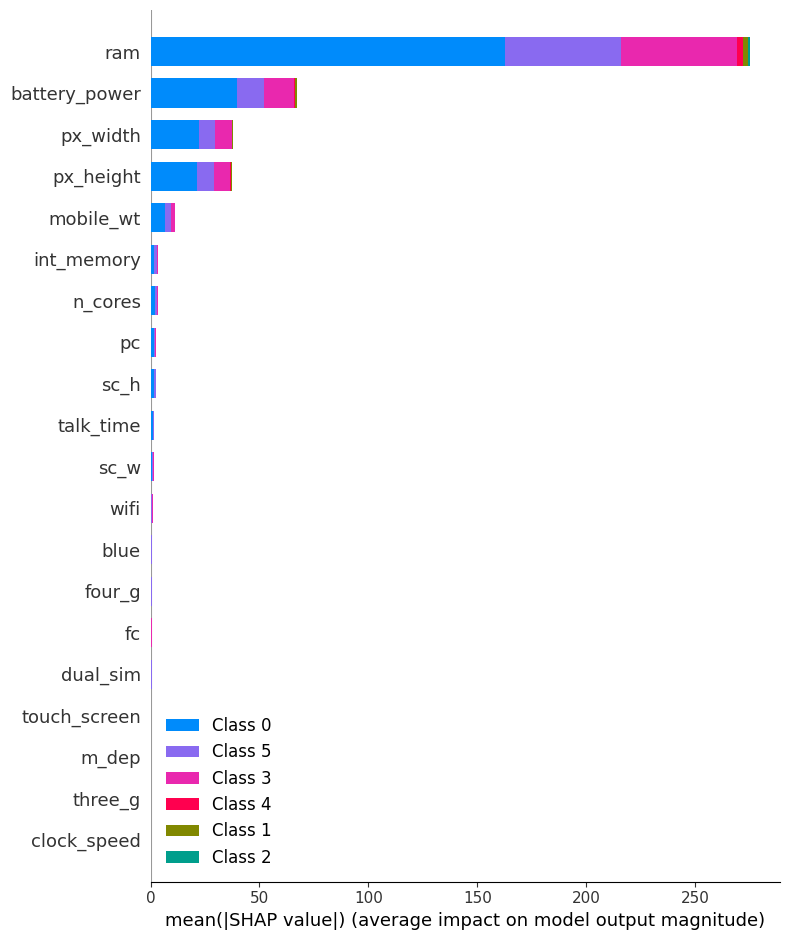


SHAP Summary Plot (Beeswarm): Detail pengaruh fitur per kelas.


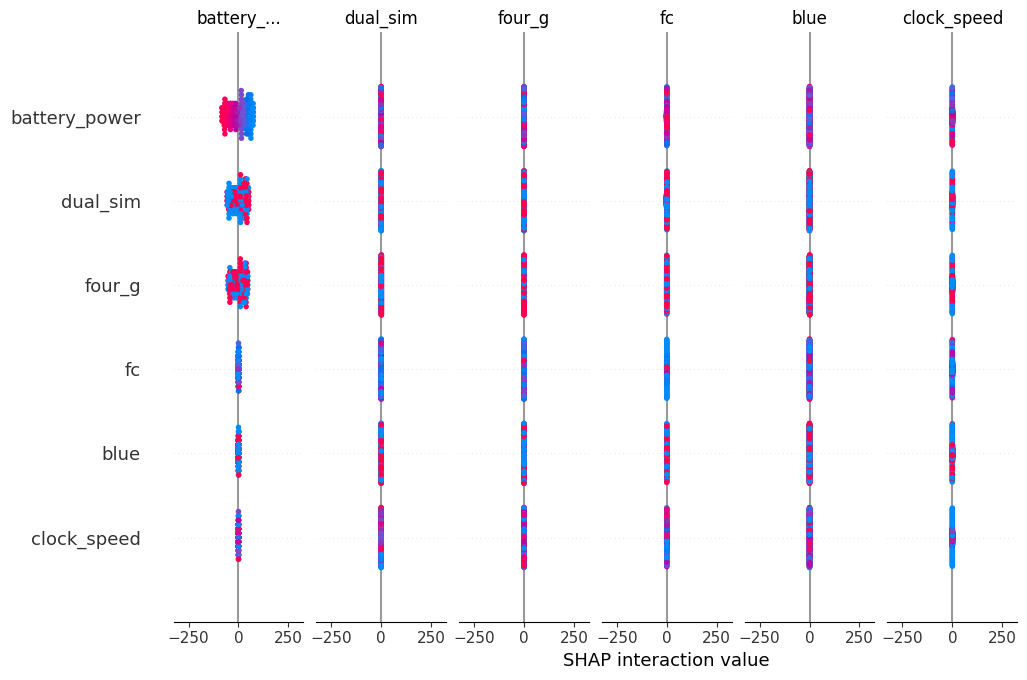

In [8]:
# Inisialisasi javascript untuk plotting di notebook
shap.initjs()

# --- BAGIAN DIAGNOSTIK (OPSIONAL) ---
# Untuk memastikan struktur shap_values sudah benar (seharusnya list dengan panjang 4)
print(f"Tipe dari shap_values: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"Jumlah kelas dalam shap_values: {len(shap_values)}")
print("--- SELESAI DIAGNOSTIK ---\n")


# --- PLOT 1: BAR PLOT (GLOBAL IMPORTANCE) ---
# Cara yang benar adalah tanpa class_names untuk mendapatkan ringkasan global
print("SHAP Summary Plot (Bar): Menunjukkan fitur paling berpengaruh secara global.")
shap.summary_plot(shap_values, X_test, plot_type="bar")


# --- PLOT 2: BEESWARM PLOT (DETAIL PER KELAS) ---
# Untuk beeswarm plot, kita tetap menggunakan class_names
print("\nSHAP Summary Plot (Beeswarm): Detail pengaruh fitur per kelas.")
shap.summary_plot(shap_values, X_test, class_names=['Murah', 'Sedang', 'Mahal', 'Sangat Mahal'])

✅ Step 1: Library berhasil di-import.
✅ Step 2: Data berhasil dimuat dan dibagi.
✅ Step 3: Model SVM berhasil dilatih.

⏳ Step 4: Menyiapkan KernelExplainer dan menghitung SHAP values...
Proses ini mungkin memakan waktu beberapa menit, harap tunggu...


  0%|          | 0/100 [00:00<?, ?it/s]

✅ Step 4: Explainer dan SHAP values berhasil dibuat.

🚀 Menampilkan Force Plot + ringkasan (format SHAP sudah dinormalisasi)...
🎯 Prediksi tertinggi: Murah (p = 0.997)
🔎 Probabilitas per kelas:
  - Murah         : 0.997
  - Sedang        : 0.000
  - Mahal         : 0.002
  - Sangat Mahal  : 0.001


<Figure size 1000x140 with 0 Axes>

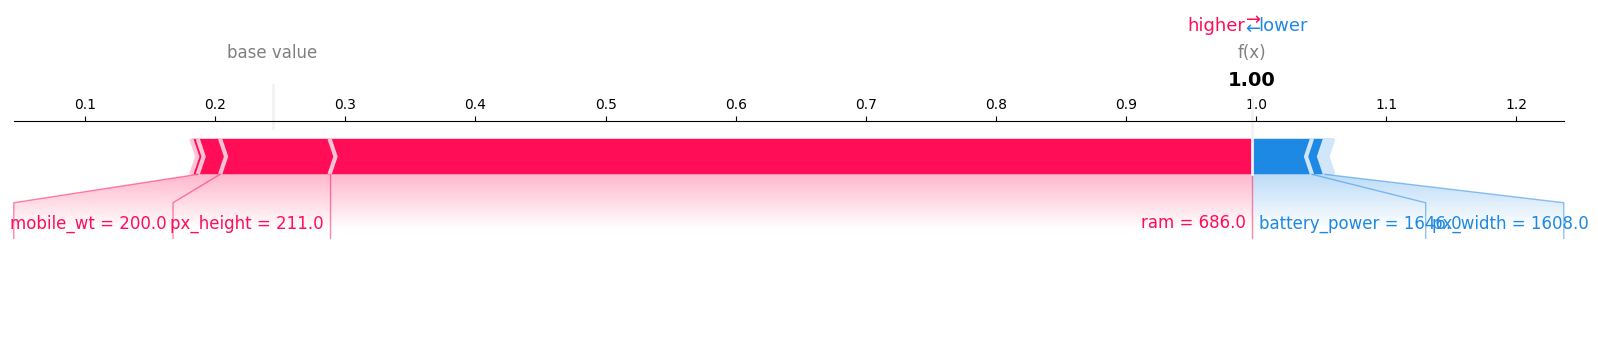

<Figure size 640x480 with 0 Axes>

💾 Disimpan sebagai: force_plot_instance.png

📌 Top fitur untuk sampel ini:
  ram = 686.0  |  SHAP = +0.7090 ↗︎ (naikkan peluang)
  px_height = 211.0  |  SHAP = +0.0841 ↗︎ (naikkan peluang)
  battery_power = 1646.0  |  SHAP = -0.0460 ↘︎ (turunkan peluang)
  mobile_wt = 200.0  |  SHAP = +0.0172 ↗︎ (naikkan peluang)
  px_width = 1608.0  |  SHAP = -0.0100 ↘︎ (turunkan peluang)
  n_cores = 2.0  |  SHAP = +0.0049 ↗︎ (naikkan peluang)
  pc = 5.0  |  SHAP = -0.0020 ↘︎ (turunkan peluang)
  talk_time = 11.0  |  SHAP = -0.0017 ↘︎ (turunkan peluang)


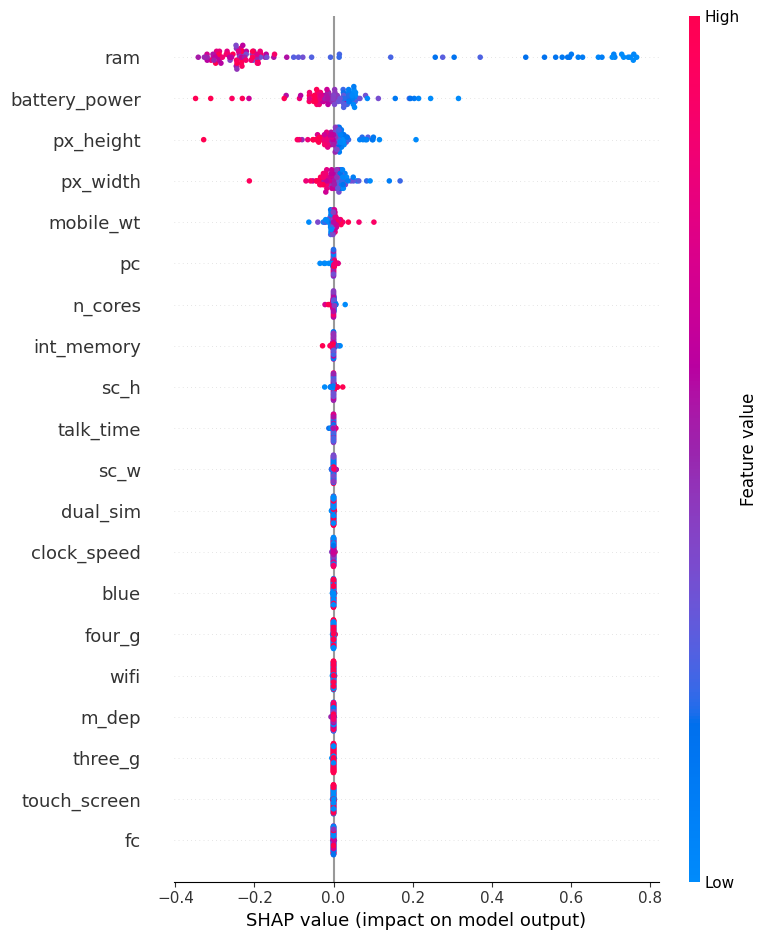

In [9]:
# 1. IMPORT SEMUA LIBRARY YANG DIBUTUHKAN
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

print("✅ Step 1: Library berhasil di-import.")

# 2. MUAT DAN PERSIAPKAN DATA
try:
    df = pd.read_csv('train.csv')
    X = df.drop('price_range', axis=1)
    y = df['price_range']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test_sample = X_test.head(100)
    print("✅ Step 2: Data berhasil dimuat dan dibagi.")
except FileNotFoundError:
    print("❌ ERROR: File 'train.csv' tidak ditemukan. Mohon upload file tersebut.")
    exit()

# 3. LATIH MODEL SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
print("✅ Step 3: Model SVM berhasil dilatih.")

# 4. BUAT EXPLAINER DAN HITUNG NILAI SHAP
print("\n⏳ Step 4: Menyiapkan KernelExplainer dan menghitung SHAP values...")
print("Proses ini mungkin memakan waktu beberapa menit, harap tunggu...")
X_train_summary = shap.kmeans(X_train, 50)
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train_summary)
shap_values = explainer.shap_values(X_test_sample)
print("✅ Step 4: Explainer dan SHAP values berhasil dibuat.")

# ===================================================================
# 5. KODE VISUALISASI BARU (Sudah Terintegrasi)
# ===================================================================
class_names = ['Murah', 'Sedang', 'Mahal', 'Sangat Mahal']

def to_classwise(shap_values, X, n_classes):
    """Kembalikan list-per-kelas: [array(shape=(n_samples, n_features)), ...]"""
    n_samples, n_features = X.shape

    # Kasus A: sudah per-kelas -> (n_samples, n_features)
    if isinstance(shap_values, list) and len(shap_values) == n_classes:
        if shap_values[0].ndim == 2 and shap_values[0].shape[0] == n_samples:
            return shap_values

    # Kasus B: per-sampel -> (n_features, n_classes)
    if isinstance(shap_values, list) and len(shap_values) == n_samples:
        if hasattr(shap_values[0], "shape") and shap_values[0].shape == (n_features, n_classes):
            S = np.stack(shap_values, axis=0)  # (n_samples, n_features, n_classes)
            return [S[:, :, k] for k in range(n_classes)]

    # Kasus C: ndarray 3D
    if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
        # (n_samples, n_features, n_classes)
        if shap_values.shape[0] == n_samples and shap_values.shape[1] == n_features:
            return [shap_values[:, :, k] for k in range(n_classes)]
        # (n_samples, n_classes, n_features)
        if shap_values.shape[0] == n_samples and shap_values.shape[1] == n_classes:
            return [shap_values[:, k, :] for k in range(n_classes)]

    # Kasus D: biner -> satu array (n_samples, n_features)
    if isinstance(shap_values, np.ndarray) and shap_values.ndim == 2 and shap_values.shape == (n_samples, n_features):
        return [shap_values]

    raise ValueError(
        f"Format shap_values tak dikenali. type={type(shap_values)}, "
        f"shape={getattr(shap_values,'shape',None)}, len={len(shap_values) if isinstance(shap_values, list) else 'NA'}"
    )

# --- Normalisasi ke format per-kelas ---
shap_values_cw = to_classwise(shap_values, X_test_sample, n_classes=len(class_names))

print("\n🚀 Menampilkan Force Plot + ringkasan (format SHAP sudah dinormalisasi)...")

# --- Pilih sampel & kelas (otomatis pakai p tertinggi) ---
instance_index = 0
x_row = X_test_sample.iloc[instance_index]
proba = svm_model.predict_proba(x_row.to_frame().T)[0]
class_index = int(np.argmax(proba))
pred_label = class_names[class_index]

print(f"🎯 Prediksi tertinggi: {pred_label} (p = {proba[class_index]:.3f})")
print("🔎 Probabilitas per kelas:")
for i, nm in enumerate(class_names):
    print(f"  - {nm:14s}: {proba[i]:.3f}")

# --- Ambil vektor SHAP yang benar (panjang = n_features) ---
sv = shap_values_cw[class_index][instance_index]  # shape: (n_features,)

# --- Force plot via Explanation (stabil) ---
exp = shap.Explanation(
    values=sv,
    base_values=float(explainer.expected_value[class_index]),
    data=x_row.values,
    feature_names=x_row.index.tolist()
)

plt.figure(figsize=(10, 1.4))
try:
    shap.plots.force(exp, matplotlib=True)
except Exception as e:
    # fallback untuk SHAP lama
    shap.force_plot(
        exp.base_values,
        exp.values,
        features=pd.Series(exp.data, index=exp.feature_names),
        matplotlib=True
    )

plt.gcf().suptitle(
    f"SHAP Force Plot — Kelas: {pred_label} (p={proba[class_index]:.2f})",
    y=1.10, fontsize=12
)
plt.tight_layout()
plt.savefig("force_plot_instance.png", dpi=150, bbox_inches="tight")
plt.show()
print("💾 Disimpan sebagai: force_plot_instance.png")

# --- Top fitur (kontribusi absolut terbesar) ---
abs_s = np.abs(exp.values)
order = np.argsort(abs_s)[::-1]
top_k = 8
print("\n📌 Top fitur untuk sampel ini:")
for j in order[:top_k]:
    direction = "↗︎ (naikkan peluang)" if exp.values[j] > 0 else "↘︎ (turunkan peluang)"
    print(f"  {exp.feature_names[j]} = {exp.data[j]}  |  SHAP = {exp.values[j]:+.4f} {direction}")

# --- Summary/beeswarm untuk kelas terpilih (sekarang dimensinya cocok) ---
try:
    shap.summary_plot(
        shap_values_cw[class_index],
        X_test_sample,
        feature_names=X_test_sample.columns,
        plot_type="dot",
        show=True
    )
except Exception as e:
    print("Gagal membuat summary_plot:", e)